<a href="https://colab.research.google.com/github/eksq1/dodo/blob/main/inclass/0522_CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#고양이와 강아지 데이터를 다운로드하고 압축
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2024-05-22 01:18:57--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.207, 74.125.201.207, 74.125.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  88.4MB/s    in 0.7s    

2024-05-22 01:18:58 (88.4 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [4]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
rootPath = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(rootPath, 'train')
validation_dir = os.path.join(rootPath, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.905.jpg', 'cat.381.jpg', 'cat.552.jpg', 'cat.186.jpg', 'cat.642.jpg', 'cat.39.jpg', 'cat.8.jpg', 'cat.286.jpg', 'cat.810.jpg', 'cat.879.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [7]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


In [8]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rootPath = '/tmp/cats_and_dogs_filtered'

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

In [9]:
trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train'),
    target_size=(64, 64),
    subset='training'
)

Found 1800 images belonging to 2 classes.


In [10]:
validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'validation'),
    target_size=(64, 64),
    subset='validation'
)

Found 100 images belonging to 2 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

model.add(layers.InputLayer(input_shape=(64, 64, 3)))
model.add(layers.Conv2D(16, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

In [12]:
trainGen.samples

1800

In [13]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['acc'],
)

In [14]:
epochs = 32
history = model.fit_generator(
    trainGen,
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs,
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
)

<ipython-input-14-b67571541efc>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/32
57/56 [==============================] - ETA: 0s - loss: 0.6935 - acc: 0.5228

56/56 [==============================] - 21s 335ms/step - loss: 0.6935 - acc: 0.5228 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/32
56/56 [==============================] - 19s 338ms/step - loss: 0.6924 - acc: 0.5150
Epoch 3/32
56/56 [==============================] - 22s 391ms/step - loss: 0.6847 - acc: 0.5450
Epoch 4/32
56/56 [==============================] - 16s 277ms/step - loss: 0.6782 - acc: 0.5639
Epoch 5/32
56/56 [==============================] - 16s 286ms/step - loss: 0.6653 - acc: 0.5856
Epoch 6/32
56/56 [==============================] - 16s 278ms/step - loss: 0.6553 - acc: 0.5883
Epoch 7/32
56/56 [==============================] - 16s 289ms/step - loss: 0.6530 - acc: 0.6161
Epoch 8/32
56/56 [==============================] - 16s 290ms/step - loss: 0.6359 - acc: 0.6389
Epoch 9/32
56/56 [==============================] - 18s 311ms/step - loss: 0.6324 - acc: 0.6444
Epoch 10/32
56/56 [==============================] - 17s 293ms/step - loss: 0.6199 - acc: 0.6500
Epoch 11/32
5

In [15]:
print("-- Evaluate --")
scores = model.evaluate_generator(validationGen, steps=5)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --


<ipython-input-15-2568f98f15cf>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(validationGen, steps=5)


acc: 78.00%


In [16]:
model.evaluate_generator(validationGen)

<ipython-input-16-8ef3a80f4427>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validationGen)


[0.5073248744010925, 0.7400000095367432]

In [17]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(16, 1))

    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()

ValueError: x and y must have same first dimension, but have shapes (32,) and (1,)

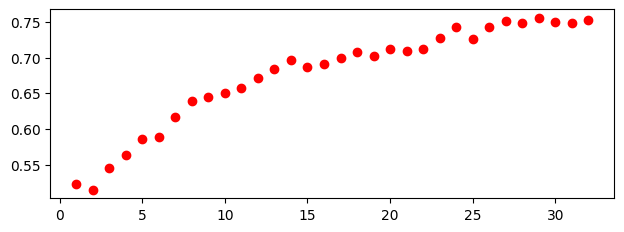

In [21]:
show_graph(history.history)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

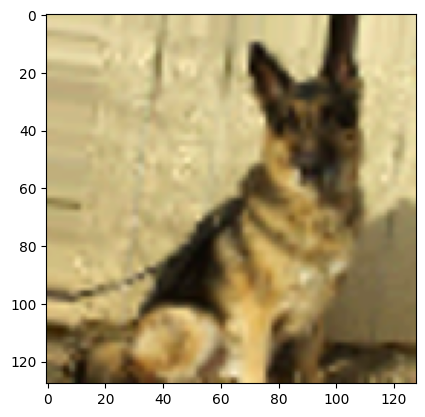

In [18]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

cls_index = ['고양이', '개']

imgs = validationGen.next()
arr = imgs[0][0]
img = array_to_img(arr).resize((128, 128))
plt.imshow(img)
result = model.predict_classes(arr.reshape(1, 64, 64, 3))
print('예측: {}'.format(cls_index[result[0]]))
print('정답: {}'.format(cls_index[np.argmax(imgs[1][0])]))